Importing the libraries:

In [1]:
import pandas as pd
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as smf

Importing the Dataset:

In [2]:
data = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


Preprocessing the data:

In [3]:
# Adding t and t_square columns
t = [x for x in range(1,len(data.Sales)+1)]
t_square = [x*x for x in t]
data["t"] = t
data["t_square"] = t_square
data

,Quarter,Sales,t,t_square
0,Q1_86,1734.827000,1,1
1,Q2_86,2244.960999,2,4
2,Q3_86,2533.804993,3,9
3,Q4_86,2154.962997,4,16
4,Q1_87,1547.818996,5,25
5,Q2_87,2104.411995,6,36
6,Q3_87,2014.362999,7,49
7,Q4_87,1991.746998,8,64
8,Q1_88,1869.049999,9,81
9,Q2_88,2313.631996,10,100


In [4]:
# Adding quarter column
data["quarter"] = data.Quarter.str[:2]
data
quarter = [x[0] for x in data.iloc[0:4,4:5].values]
quarter

['Q1', 'Q2', 'Q3', 'Q4']

In [5]:
dummies = pd.get_dummies(data.quarter, columns=quarter)

In [6]:
dummies

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0


We took dummies of the 12 months for the model building`

In [7]:
for q in quarter:
    data[q] = dummies[q]

data

,Quarter,Sales,t,t_square,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,1,1,Q1,1,0,0,0
1,Q2_86,2244.960999,2,4,Q2,0,1,0,0
2,Q3_86,2533.804993,3,9,Q3,0,0,1,0
3,Q4_86,2154.962997,4,16,Q4,0,0,0,1
4,Q1_87,1547.818996,5,25,Q1,1,0,0,0
5,Q2_87,2104.411995,6,36,Q2,0,1,0,0
6,Q3_87,2014.362999,7,49,Q3,0,0,1,0
7,Q4_87,1991.746998,8,64,Q4,0,0,0,1
8,Q1_88,1869.049999,9,81,Q1,1,0,0,0
9,Q2_88,2313.631996,10,100,Q2,0,1,0,0


In [8]:
data["Year"] = "19" + data.Quarter.str[3:]
data

,Quarter,Sales,t,t_square,quarter,Q1,Q2,Q3,Q4,Year
0,Q1_86,1734.827000,1,1,Q1,1,0,0,0,1986
1,Q2_86,2244.960999,2,4,Q2,0,1,0,0,1986
2,Q3_86,2533.804993,3,9,Q3,0,0,1,0,1986
3,Q4_86,2154.962997,4,16,Q4,0,0,0,1,1986
4,Q1_87,1547.818996,5,25,Q1,1,0,0,0,1987
5,Q2_87,2104.411995,6,36,Q2,0,1,0,0,1987
6,Q3_87,2014.362999,7,49,Q3,0,0,1,0,1987
7,Q4_87,1991.746998,8,64,Q4,0,0,0,1,1987
8,Q1_88,1869.049999,9,81,Q1,1,0,0,0,1988
9,Q2_88,2313.631996,10,100,Q2,0,1,0,0,1988


In [9]:
# Adding log_Passengers column
data["log_Sales"] = np.log(data["Sales"])
data

,Quarter,Sales,t,t_square,quarter,Q1,Q2,Q3,Q4,Year,log_Sales
0,Q1_86,1734.827000,1,1,Q1,1,0,0,0,1986,7.458663
1,Q2_86,2244.960999,2,4,Q2,0,1,0,0,1986,7.716443
2,Q3_86,2533.804993,3,9,Q3,0,0,1,0,1986,7.837477
3,Q4_86,2154.962997,4,16,Q4,0,0,0,1,1986,7.675529
4,Q1_87,1547.818996,5,25,Q1,1,0,0,0,1987,7.344602
5,Q2_87,2104.411995,6,36,Q2,0,1,0,0,1987,7.651791
6,Q3_87,2014.362999,7,49,Q3,0,0,1,0,1987,7.608058
7,Q4_87,1991.746998,8,64,Q4,0,0,0,1,1987,7.596767
8,Q1_88,1869.049999,9,81,Q1,1,0,0,0,1988,7.533186
9,Q2_88,2313.631996,10,100,Q2,0,1,0,0,1988,7.746574


EDA:

<Axes: xlabel='quarter', ylabel='Year'>

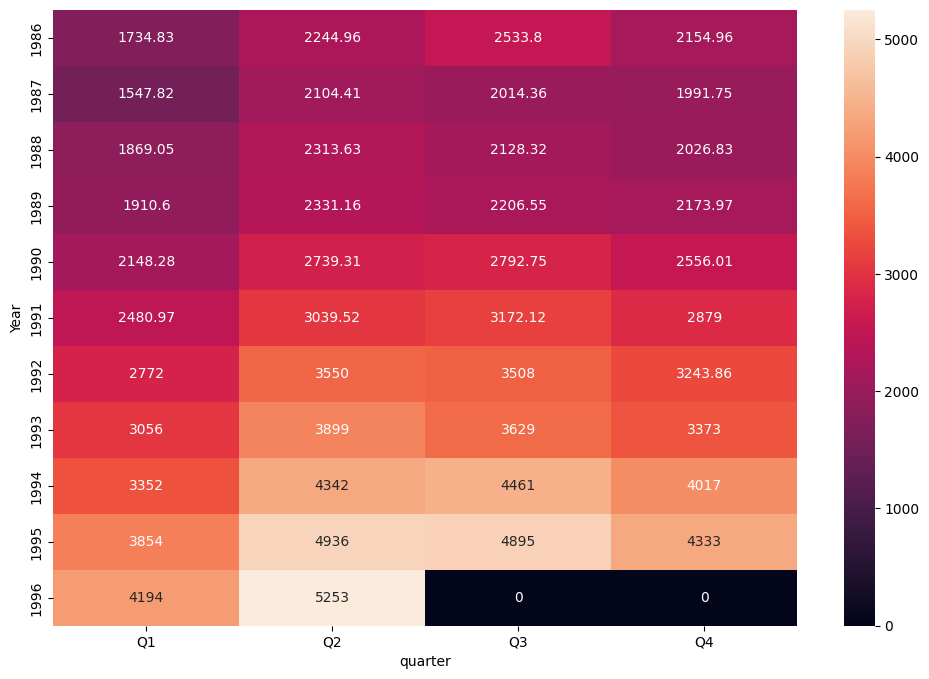

In [10]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=data,values="Sales",index="Year",columns="quarter",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

<Axes: xlabel='Year', ylabel='Sales'>

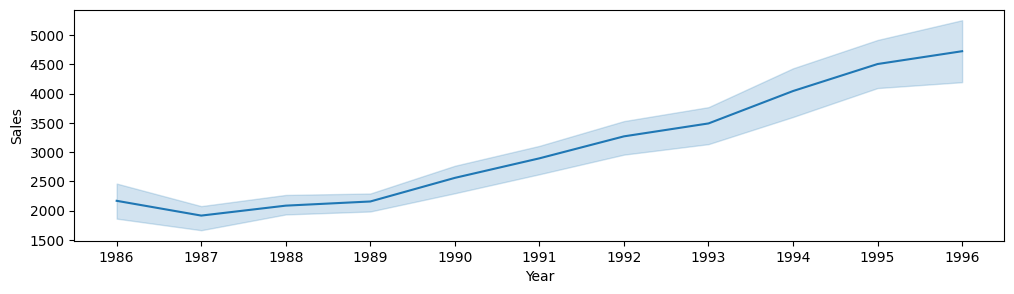

In [11]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Sales",data=data)

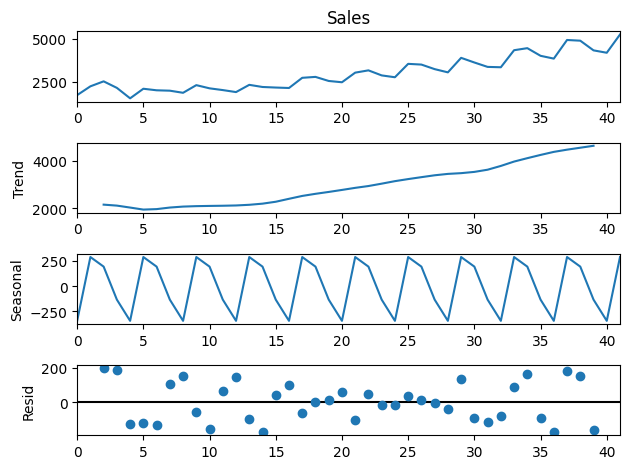

In [12]:
decompose_ts_add = seasonal_decompose(data.Sales,period=4)
decompose_ts_add.plot()
plt.show()

Building different models:

In [14]:
Train = data.head(30)
Test = data.tail(11)

In [15]:
#Linear Model
linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test["Sales"])-np.array(pred_linear))**2))

#Exponential
Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))

#Quadratic
Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))

#Additive seasonality
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1',"Q2","Q3","Q4"]]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))

#Additive Seasonality Quadratic
add_sea_Quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1',"Q2","Q3","Q4",'t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))

#Multiplicative Seasonality
Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))

#Multiplicative Additive Seasonality
Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))

rmse_data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(rmse_data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,428.489619
1,rmse_Exp,573.280376
4,rmse_add_sea_quad,601.489086
2,rmse_Quad,672.551679
0,rmse_linear,741.597019
3,rmse_add_sea,1832.092377
5,rmse_Mult_sea,1883.484946


Observation: We can see that the rmse value is least for the Multiplicative Additive Seasonality model. We can use it as the final model

In [16]:
data

,Quarter,Sales,t,t_square,quarter,Q1,Q2,Q3,Q4,Year,log_Sales
0,Q1_86,1734.827000,1,1,Q1,1,0,0,0,1986,7.458663
1,Q2_86,2244.960999,2,4,Q2,0,1,0,0,1986,7.716443
2,Q3_86,2533.804993,3,9,Q3,0,0,1,0,1986,7.837477
3,Q4_86,2154.962997,4,16,Q4,0,0,0,1,1986,7.675529
4,Q1_87,1547.818996,5,25,Q1,1,0,0,0,1987,7.344602
5,Q2_87,2104.411995,6,36,Q2,0,1,0,0,1987,7.651791
6,Q3_87,2014.362999,7,49,Q3,0,0,1,0,1987,7.608058
7,Q4_87,1991.746998,8,64,Q4,0,0,0,1,1987,7.596767
8,Q1_88,1869.049999,9,81,Q1,1,0,0,0,1988,7.533186
9,Q2_88,2313.631996,10,100,Q2,0,1,0,0,1988,7.746574


Final model using Multiplicative Additive Seasonality:

In [17]:
model_full = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = Train).fit()

In [18]:
pred_new  = pd.Series(add_sea_Quad.predict(data))
pred_new

0     1776.174823
1     2284.317427
2     2222.091264
3     1963.875389
4     1712.306543
5     2243.210152
6     2203.744995
7     1968.290126
8     1739.482285
9     2293.146900
10    2276.442749
11    2063.748885
12    1857.702050
13    2434.127671
14    2440.184525
15    2250.251667
16    2066.965837
17    2666.152463
18    2694.970322
19    2527.798470
20    2367.273646
21    2989.221277
22    3040.800142
23    2896.389295
24    2758.625477
25    3403.334114
26    3477.673984
27    3356.024143
28    3241.021330
29    3908.490973
30    4005.591849
31    3906.703013
32    3814.461205
33    4504.691853
34    4624.553735
35    4548.425905
36    4478.945103
37    5191.936756
38    5334.559643
39    5281.192819
40    5234.473022
41    5970.225681
dtype: float64

In [19]:
data["forecasted_Sales"] = pd.Series(pred_new)

In [20]:
data

,Quarter,Sales,t,t_square,quarter,Q1,Q2,Q3,Q4,Year,log_Sales,forecasted_Sales
0,Q1_86,1734.827000,1,1,Q1,1,0,0,0,1986,7.458663,1776.174823
1,Q2_86,2244.960999,2,4,Q2,0,1,0,0,1986,7.716443,2284.317427
2,Q3_86,2533.804993,3,9,Q3,0,0,1,0,1986,7.837477,2222.091264
3,Q4_86,2154.962997,4,16,Q4,0,0,0,1,1986,7.675529,1963.875389
4,Q1_87,1547.818996,5,25,Q1,1,0,0,0,1987,7.344602,1712.306543
5,Q2_87,2104.411995,6,36,Q2,0,1,0,0,1987,7.651791,2243.210152
6,Q3_87,2014.362999,7,49,Q3,0,0,1,0,1987,7.608058,2203.744995
7,Q4_87,1991.746998,8,64,Q4,0,0,0,1,1987,7.596767,1968.290126
8,Q1_88,1869.049999,9,81,Q1,1,0,0,0,1988,7.533186,1739.482285
9,Q2_88,2313.631996,10,100,Q2,0,1,0,0,1988,7.746574,2293.146900


In [21]:
model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Sales   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     37.94
Date:                Sun, 02 Jul 2023   Prob (F-statistic):           2.83e-10
Time:                        15:01:23   Log-Likelihood:                 31.764
No. Observations:                  30   AIC:                            -53.53
Df Residuals:                      25   BIC:                            -46.52
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9754      0.028    216.544      0.000       5.919       6.032
t              0.0214      0.002     11.033      0.000       0.017       0.025
Q1             1.3697      0.029     47.238      0.000       1.310       1.429
Q2             1.5875      0.029     54.006      0.000       1.527       1.648
Q3             1.5556      0.031     50.975      0.000       1.493       1.618
Q4             1.4626      0.031     47.337      0.000       1.399       1.526
==============================================================================
Omnibus:                        3.984   Durbin-Watson:                   0.609
Prob(Omnibus):                  0.136   Jarque-Bera (JB):                2.483
Skew:                           0.635   Prob(JB):                        0.289
Kurtosis:                       3.612   Cond. No.                     2.31e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.78e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""